In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

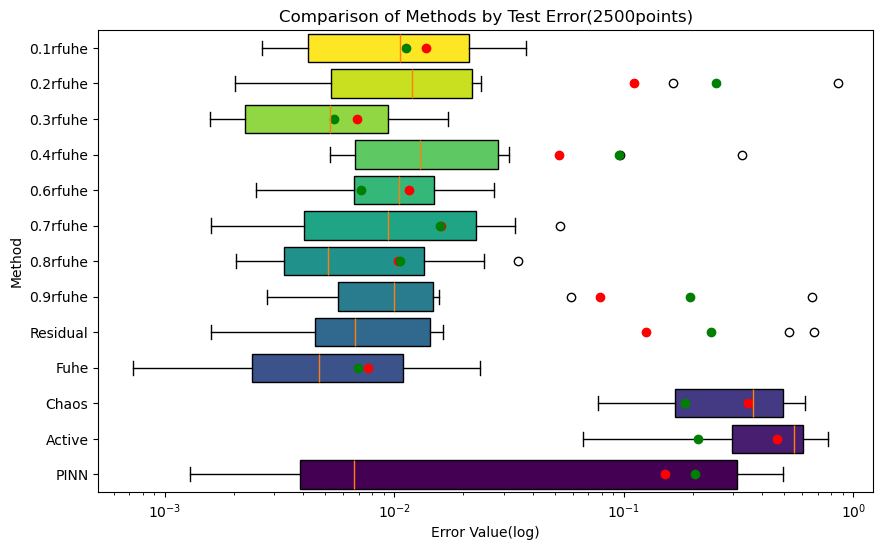

In [3]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.00428233110967777, 0.4948102035752058, 0.11508306812985755, 0.009043083333213648, 0.003763381693388318, 0.4959743682546585, 0.0012847856406215795, 0.0014136551092553925, 0.004237787713401534, 0.3778224044015434],
    'Active': [0.6063231638008062, 0.59413369069886, 0.23042553687375344, 0.5355238302038527, 0.5679925761833313, 0.28141774352400767, 0.06626014553507827, 0.6296642730309604, 0.3444257472082322, 0.7781100300510956],
    'Chaos': [0.2759847576660316, 0.12972678248371639, 0.07692084520718123, 0.5094870677330113, 0.5725038633743614, 0.44135903487479283, 0.40001317799106884, 0.11285853103263466, 0.617785040002337, 0.33383057828088186],
    'Fuhe': [0.011701677697590328, 0.008292092831073334, 0.0029595378834249694, 0.023502073550272284, 0.0022191892264298747, 0.003273610161517001, 0.015686097676511638, 0.00612880243443672, 0.002086598936694936, 0.0007286249961699813],
    'Residual': [0.0015908442295945026, 0.004135597772210851, 0.005617392227208113, 0.0069625742936250175, 0.002235707361192807, 0.00808695753261522, 0.01631055596753674, 0.6757882331138769, 0.5247814588207679, 0.006501573133538659],
    '0.9rfuhe': [0.00790125212378842, 0.002785415764382796, 0.011773522579372682, 0.004971737639777676, 0.011955151355342905, 0.003171749318904966, 0.015686097676511638, 0.05889856279082812, 0.008161316452346799, 0.6581121578809855],
    '0.8rfuhe': [0.006216115239279511, 0.034685897050475235, 0.00404541964862889, 0.0246793191609809, 0.0022088307043499882, 0.0038805882102153594, 0.015686097676511638, 0.006856396168616088, 0.002041978666133068, 0.0031078190555537404],
    '0.7rfuhe': [0.052761562962274015, 0.0015874037807804468, 0.010831453977205594, 0.033636255623715874, 0.0028095873147815855, 0.025030344768271005, 0.015686097676511638, 0.0079374855071862, 0.001760097263415819, 0.007682602708903682],
    '0.6rfuhe': [0.00317818494299867, 0.012699895399498925, 0.027143016556663953, 0.011416964271928603, 0.002488524164634663, 0.008679037901236334, 0.015686097676511638, 0.018980570747168957, 0.009544484128587502, 0.0060245964798572235],
    '0.4rfuhe': [0.09627386767763006, 0.3256653593222804, 0.007732715897550287, 0.005238732623811142, 0.0064275493434047, 0.03150330020864781, 0.015686097676511638, 0.005268226590757582, 0.018299858804730753, 0.010064803114946792],
    '0.3rfuhe': [0.0015724259423412284, 0.0018159575342093636, 0.002402239639421364, 0.017116024915319838, 0.006352370084598258, 0.010002833450750042, 0.015686097676511638, 0.007467156223166026, 0.004097714668519466, 0.0021794466848969792],
    '0.2rfuhe': [0.004485820871193505, 0.004291552501535658, 0.01408257288864568, 0.02382331573918413, 0.8568962362460987, 0.0020273201525360753, 0.015686097676511638, 0.00976765380273995, 0.007805740143892516, 0.16311141785709782],
    '0.1rfuhe': [0.002661129228913527, 0.004022277588115764, 0.0221181133261648, 0.02465775374041146, 0.003003490858239239, 0.018163466392569733, 0.015686097676511638, 0.005389862330815556, 0.037304667240401566, 0.0047270947049400875]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(2500points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

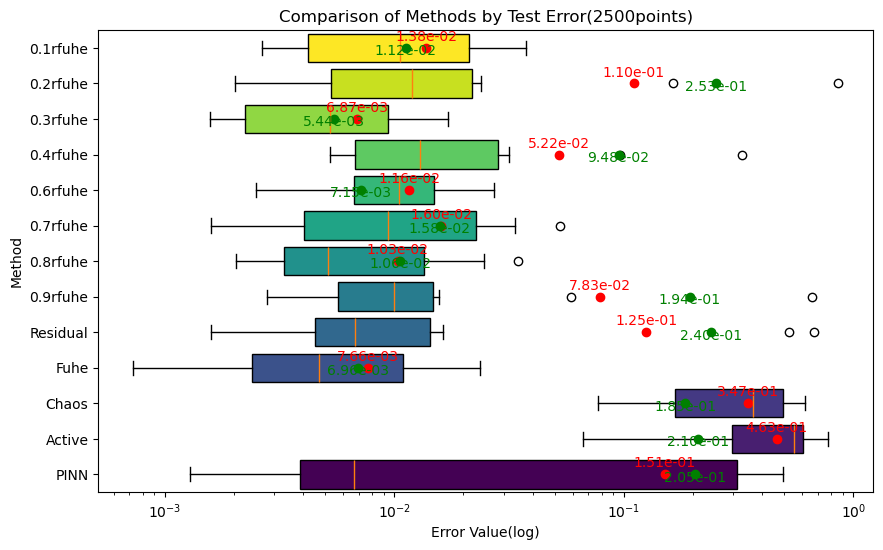

In [8]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.00428233110967777, 0.4948102035752058, 0.11508306812985755, 0.009043083333213648, 0.003763381693388318, 0.4959743682546585, 0.0012847856406215795, 0.0014136551092553925, 0.004237787713401534, 0.3778224044015434],
    'Active': [0.6063231638008062, 0.59413369069886, 0.23042553687375344, 0.5355238302038527, 0.5679925761833313, 0.28141774352400767, 0.06626014553507827, 0.6296642730309604, 0.3444257472082322, 0.7781100300510956],
    'Chaos': [0.2759847576660316, 0.12972678248371639, 0.07692084520718123, 0.5094870677330113, 0.5725038633743614, 0.44135903487479283, 0.40001317799106884, 0.11285853103263466, 0.617785040002337, 0.33383057828088186],
    'Fuhe': [0.011701677697590328, 0.008292092831073334, 0.0029595378834249694, 0.023502073550272284, 0.0022191892264298747, 0.003273610161517001, 0.015686097676511638, 0.00612880243443672, 0.002086598936694936, 0.0007286249961699813],
    'Residual': [0.0015908442295945026, 0.004135597772210851, 0.005617392227208113, 0.0069625742936250175, 0.002235707361192807, 0.00808695753261522, 0.01631055596753674, 0.6757882331138769, 0.5247814588207679, 0.006501573133538659],
    '0.9rfuhe': [0.00790125212378842, 0.002785415764382796, 0.011773522579372682, 0.004971737639777676, 0.011955151355342905, 0.003171749318904966, 0.015686097676511638, 0.05889856279082812, 0.008161316452346799, 0.6581121578809855],
    '0.8rfuhe': [0.006216115239279511, 0.034685897050475235, 0.00404541964862889, 0.0246793191609809, 0.0022088307043499882, 0.0038805882102153594, 0.015686097676511638, 0.006856396168616088, 0.002041978666133068, 0.0031078190555537404],
    '0.7rfuhe': [0.052761562962274015, 0.0015874037807804468, 0.010831453977205594, 0.033636255623715874, 0.0028095873147815855, 0.025030344768271005, 0.015686097676511638, 0.0079374855071862, 0.001760097263415819, 0.007682602708903682],
    '0.6rfuhe': [0.00317818494299867, 0.012699895399498925, 0.027143016556663953, 0.011416964271928603, 0.002488524164634663, 0.008679037901236334, 0.015686097676511638, 0.018980570747168957, 0.009544484128587502, 0.0060245964798572235],
    '0.4rfuhe': [0.09627386767763006, 0.3256653593222804, 0.007732715897550287, 0.005238732623811142, 0.0064275493434047, 0.03150330020864781, 0.015686097676511638, 0.005268226590757582, 0.018299858804730753, 0.010064803114946792],
    '0.3rfuhe': [0.0015724259423412284, 0.0018159575342093636, 0.002402239639421364, 0.017116024915319838, 0.006352370084598258, 0.010002833450750042, 0.015686097676511638, 0.007467156223166026, 0.004097714668519466, 0.0021794466848969792],
    '0.2rfuhe': [0.004485820871193505, 0.004291552501535658, 0.01408257288864568, 0.02382331573918413, 0.8568962362460987, 0.0020273201525360753, 0.015686097676511638, 0.00976765380273995, 0.007805740143892516, 0.16311141785709782],
    '0.1rfuhe': [0.002661129228913527, 0.004022277588115764, 0.0221181133261648, 0.02465775374041146, 0.003003490858239239, 0.018163466392569733, 0.015686097676511638, 0.005389862330815556, 0.037304667240401566, 0.0047270947049400875]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(2500points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

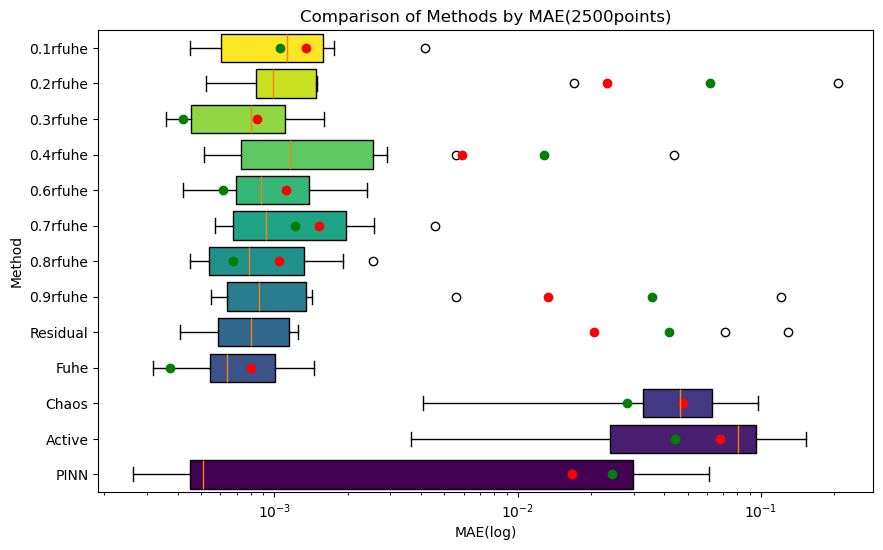

In [4]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.00045604090313484144, 0.06140743750950199, 0.006229224581071177, 0.0005540785645682675, 0.00046036649693991687, 0.059962646508573414, 0.0002632301631975943, 0.00026449285790932324, 0.0004489358270843411, 0.03764770211130151],
    'Active': [0.10158647859532369, 0.08344678168940037, 0.02104544215747715, 0.07700794402021774, 0.08613808472941, 0.021572398284718224, 0.003630859185882066, 0.09800669764007114, 0.030799118982687744, 0.1526761879821755],
    'Chaos': [0.06319232382202142, 0.032027779101258834, 0.004087278583305443, 0.061657321145714025, 0.08251849629252737, 0.04986031573097678, 0.043301783207451934, 0.00947818870564569, 0.09727828652278497, 0.03533187230197265],
    'Fuhe': [0.0010366106890316801, 0.0009161170545828888, 0.0005083038710139785, 0.00144824492043442, 0.0005359798012923267, 0.0005590679777511102, 0.0014295258057730928, 0.0006509133704835405, 0.0006209697491818115, 0.0003159672866116566],
    'Residual': [0.0004089172804820133, 0.0005718082737105408, 0.0008332005755896537, 0.000813287157459349, 0.0004983565978974434, 0.0006364271836366381, 0.00125182172513681, 0.1287471555020324, 0.07126569994174828, 0.0007904165909348717],
    '0.9rfuhe': [0.0007134693473200986, 0.0006161057827859597, 0.0009185240163227959, 0.0005782263180788944, 0.0011227070963759284, 0.0005499197724467504, 0.0014295258057730928, 0.005577663807873819, 0.000817003538210001, 0.12052582286887611],
    '0.8rfuhe': [0.0009908184693359081, 0.0025477044463287817, 0.0005765486740544831, 0.0019219487546362805, 0.0004477336106557135, 0.0005266259918734101, 0.0014295258057730928, 0.0009836959603169108, 0.0004618941456311361, 0.0005842505641204317],
    '0.7rfuhe': [0.0045905159725897786, 0.0005678066144264612, 0.0008379742431076742, 0.0025717653735535264, 0.0006009460712248752, 0.002146612069322254, 0.0014295258057730928, 0.0008457951323420038, 0.0006180650787393978, 0.0010085451280266652],
    '0.6rfuhe': [0.0005065376913164069, 0.0012549538010360425, 0.002393281449713635, 0.000873954940959144, 0.00041953903656372646, 0.0008925810352838335, 0.0014295258057730928, 0.0019761001708612693, 0.0007376526856762388, 0.0006820205720917899],
    '0.4rfuhe': [0.005580771723914202, 0.044042183756312435, 0.0006961704358229242, 0.0005123190756184468, 0.0006467138001584621, 0.002899436758348937, 0.0014295258057730928, 0.0008290917679277315, 0.0012796877760050049, 0.0010444663684233428],
    '0.3rfuhe': [0.0003994028101148771, 0.0003600477445018932, 0.00043046962737154686, 0.0016048553918507006, 0.0009394789907943773, 0.0011495213684487155, 0.0014295258057730928, 0.0009591084990365632, 0.000657283919373581, 0.0005265135475955488],
    '0.2rfuhe': [0.0006309056431718584, 0.000985756262588026, 0.0009632054466828508, 0.0014924026868230488, 0.20718623867405608, 0.0005239595631059028, 0.0014295258057730928, 0.0009909748097089767, 0.0008017103648784739, 0.01706916668594487],
    '0.1rfuhe': [0.0005694959805024945, 0.0006233243069103889, 0.001467664817095119, 0.0017541772217008113, 0.0004507191979386707, 0.0016244385380404782, 0.0014295258057730928, 0.0008212490991886683, 0.004174428640367483, 0.0005966120952361731]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(2500points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

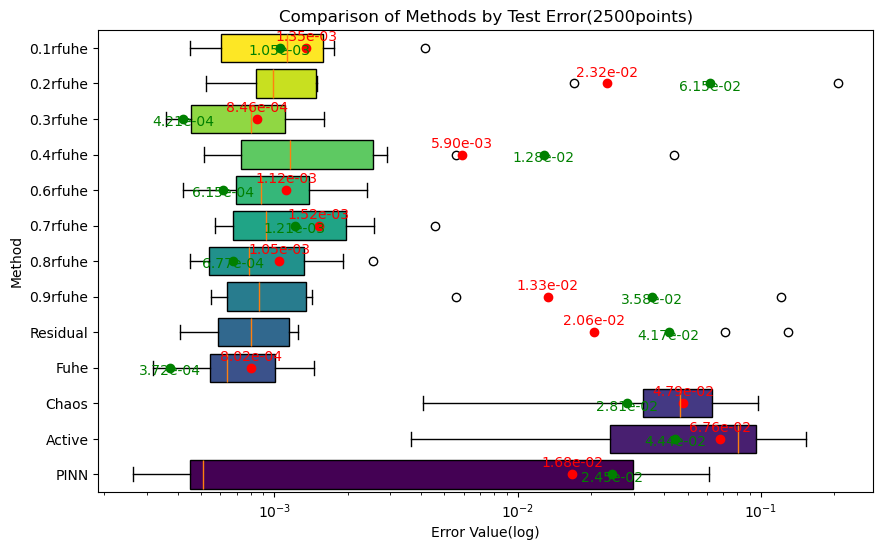

In [7]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.00045604090313484144, 0.06140743750950199, 0.006229224581071177, 0.0005540785645682675, 0.00046036649693991687, 0.059962646508573414, 0.0002632301631975943, 0.00026449285790932324, 0.0004489358270843411, 0.03764770211130151],
    'Active': [0.10158647859532369, 0.08344678168940037, 0.02104544215747715, 0.07700794402021774, 0.08613808472941, 0.021572398284718224, 0.003630859185882066, 0.09800669764007114, 0.030799118982687744, 0.1526761879821755],
    'Chaos': [0.06319232382202142, 0.032027779101258834, 0.004087278583305443, 0.061657321145714025, 0.08251849629252737, 0.04986031573097678, 0.043301783207451934, 0.00947818870564569, 0.09727828652278497, 0.03533187230197265],
    'Fuhe': [0.0010366106890316801, 0.0009161170545828888, 0.0005083038710139785, 0.00144824492043442, 0.0005359798012923267, 0.0005590679777511102, 0.0014295258057730928, 0.0006509133704835405, 0.0006209697491818115, 0.0003159672866116566],
    'Residual': [0.0004089172804820133, 0.0005718082737105408, 0.0008332005755896537, 0.000813287157459349, 0.0004983565978974434, 0.0006364271836366381, 0.00125182172513681, 0.1287471555020324, 0.07126569994174828, 0.0007904165909348717],
    '0.9rfuhe': [0.0007134693473200986, 0.0006161057827859597, 0.0009185240163227959, 0.0005782263180788944, 0.0011227070963759284, 0.0005499197724467504, 0.0014295258057730928, 0.005577663807873819, 0.000817003538210001, 0.12052582286887611],
    '0.8rfuhe': [0.0009908184693359081, 0.0025477044463287817, 0.0005765486740544831, 0.0019219487546362805, 0.0004477336106557135, 0.0005266259918734101, 0.0014295258057730928, 0.0009836959603169108, 0.0004618941456311361, 0.0005842505641204317],
    '0.7rfuhe': [0.0045905159725897786, 0.0005678066144264612, 0.0008379742431076742, 0.0025717653735535264, 0.0006009460712248752, 0.002146612069322254, 0.0014295258057730928, 0.0008457951323420038, 0.0006180650787393978, 0.0010085451280266652],
    '0.6rfuhe': [0.0005065376913164069, 0.0012549538010360425, 0.002393281449713635, 0.000873954940959144, 0.00041953903656372646, 0.0008925810352838335, 0.0014295258057730928, 0.0019761001708612693, 0.0007376526856762388, 0.0006820205720917899],
    '0.4rfuhe': [0.005580771723914202, 0.044042183756312435, 0.0006961704358229242, 0.0005123190756184468, 0.0006467138001584621, 0.002899436758348937, 0.0014295258057730928, 0.0008290917679277315, 0.0012796877760050049, 0.0010444663684233428],
    '0.3rfuhe': [0.0003994028101148771, 0.0003600477445018932, 0.00043046962737154686, 0.0016048553918507006, 0.0009394789907943773, 0.0011495213684487155, 0.0014295258057730928, 0.0009591084990365632, 0.000657283919373581, 0.0005265135475955488],
    '0.2rfuhe': [0.0006309056431718584, 0.000985756262588026, 0.0009632054466828508, 0.0014924026868230488, 0.20718623867405608, 0.0005239595631059028, 0.0014295258057730928, 0.0009909748097089767, 0.0008017103648784739, 0.01706916668594487],
    '0.1rfuhe': [0.0005694959805024945, 0.0006233243069103889, 0.001467664817095119, 0.0017541772217008113, 0.0004507191979386707, 0.0016244385380404782, 0.0014295258057730928, 0.0008212490991886683, 0.004174428640367483, 0.0005966120952361731]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(2500points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

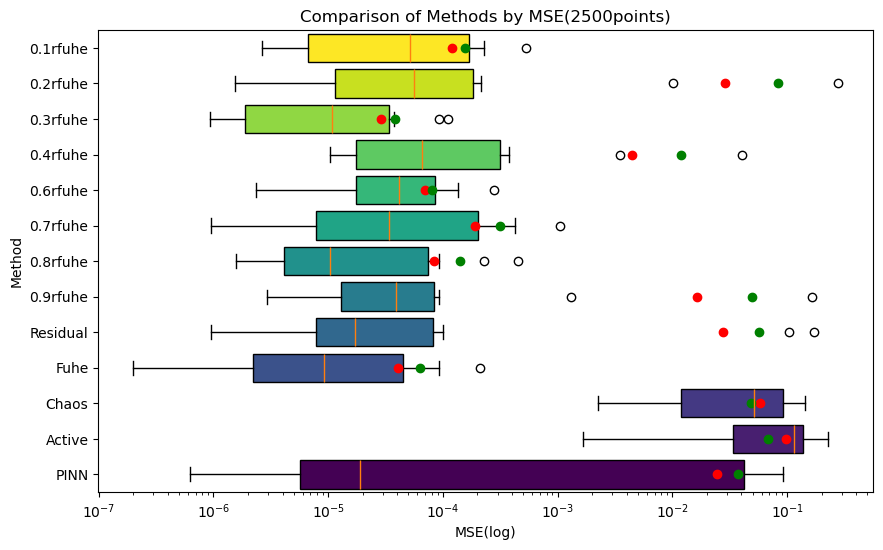

In [5]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [6.921091002359169e-06, 0.09240412635069457, 0.004998468220644346, 3.086363950964886e-05, 5.3452818239436795e-06, 0.09283944545393634, 6.229818871925989e-07, 7.542251432106574e-07, 6.777858014724389e-06, 0.05387527336453719],
    'Active': [0.13874661366907612, 0.133223988587768, 0.020038965054470628, 0.10823598511857441, 0.121758528447034, 0.029889388136603273, 0.0016569860140290783, 0.14963465145170743, 0.04477187580204935, 0.22850520595387028],
    'Chaos': [0.028746453064779392, 0.006351457045461195, 0.002233069125844485, 0.09796713364221712, 0.12370034626163105, 0.07351875000483425, 0.06038967184464405, 0.004807096696712015, 0.14404190176988302, 0.042059712658006475],
    'Fuhe': [5.167855193388376e-05, 2.595029998867116e-05, 3.305688134055423e-06, 0.00020846177626048824, 1.8586719400667226e-06, 4.044529357073959e-06, 9.286325491049593e-05, 1.4176379004242247e-05, 1.6432060880707637e-06, 2.0036515833715315e-07],
    'Residual': [9.551451743078132e-07, 6.454916925046713e-06, 1.1909226903043303e-05, 1.8295899098122542e-05, 1.8864442948084866e-06, 2.468223010653523e-05, 0.00010040413557750125, 0.17235953863045725, 0.10393720568686303, 1.595331630764609e-05],
    '0.9rfuhe': [2.3561661478542517e-05, 2.928155459564009e-06, 5.231508242554325e-05, 9.328900849247325e-06, 5.3941650322686345e-05, 3.7967480835486246e-06, 9.286325491049593e-05, 0.0013092526658403112, 2.5138219118333577e-05, 0.16346090527813192],
    '0.8rfuhe': [1.458317831613286e-05, 0.0004540669929997703, 6.176482721766509e-06, 0.0002298690075390142, 1.841360968822688e-06, 5.683412676837068e-06, 9.286325491049593e-05, 1.7742134979176992e-05, 1.573680171420777e-06, 3.6452349225672047e-06],
    '0.7rfuhe': [0.0010506289807468091, 9.510183407199235e-07, 4.4277958544573444e-05, 0.0004270014604847236, 2.9791964283929652e-06, 0.00023645458251095368, 9.286325491049593e-05, 2.377825403436167e-05, 1.1691962324531593e-06, 2.22756723850702e-05],
    '0.6rfuhe': [3.8121712650710495e-06, 6.087154989784621e-05, 0.0002780547349784154, 4.9194364629880865e-05, 2.337210326125117e-06, 2.8428715786716868e-05, 9.286325491049593e-05, 0.0001359667156182747, 3.438103860986275e-05, 1.3698404907395327e-05],
    '0.4rfuhe': [0.0034980894494958063, 0.04002738357601674, 2.2567226123408917e-05, 1.0357776570528702e-05, 1.559211073723961e-05, 0.00037456412178121437, 9.286325491049593e-05, 1.0474733055508378e-05, 0.0001263890791340411, 3.823179064511809e-05],
    '0.3rfuhe': [9.331564719820448e-07, 1.244587539665302e-06, 2.1779441053051137e-06, 0.00011056556558696953, 1.522950036110919e-05, 3.776244862120482e-05, 9.286325491049593e-05, 2.104381846870699e-05, 6.33720127070718e-06, 1.7926956753347145e-06],
    '0.2rfuhe': [7.594477964676248e-06, 6.950930268163812e-06, 7.484763587087261e-05, 0.00021419951597867348, 0.2771217050301393, 1.5511676785454796e-06, 9.286325491049593e-05, 3.600763425693499e-05, 2.2995467886916747e-05, 0.010041134803839662],
    '0.1rfuhe': [2.6726740818000537e-06, 6.106018982099964e-06, 0.00018463338403184687, 0.00022946745221915304, 3.40460474965601e-06, 0.00012451209521130747, 9.286325491049593e-05, 1.0964009843806343e-05, 0.0005252189808915258, 8.43339958761171e-06]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(2500points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

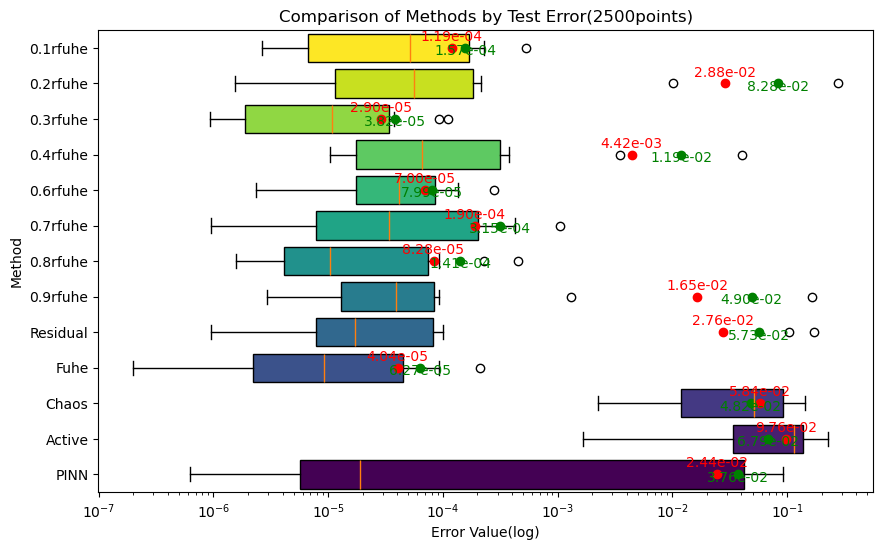

In [10]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [6.921091002359169e-06, 0.09240412635069457, 0.004998468220644346, 3.086363950964886e-05, 5.3452818239436795e-06, 0.09283944545393634, 6.229818871925989e-07, 7.542251432106574e-07, 6.777858014724389e-06, 0.05387527336453719],
    'Active': [0.13874661366907612, 0.133223988587768, 0.020038965054470628, 0.10823598511857441, 0.121758528447034, 0.029889388136603273, 0.0016569860140290783, 0.14963465145170743, 0.04477187580204935, 0.22850520595387028],
    'Chaos': [0.028746453064779392, 0.006351457045461195, 0.002233069125844485, 0.09796713364221712, 0.12370034626163105, 0.07351875000483425, 0.06038967184464405, 0.004807096696712015, 0.14404190176988302, 0.042059712658006475],
    'Fuhe': [5.167855193388376e-05, 2.595029998867116e-05, 3.305688134055423e-06, 0.00020846177626048824, 1.8586719400667226e-06, 4.044529357073959e-06, 9.286325491049593e-05, 1.4176379004242247e-05, 1.6432060880707637e-06, 2.0036515833715315e-07],
    'Residual': [9.551451743078132e-07, 6.454916925046713e-06, 1.1909226903043303e-05, 1.8295899098122542e-05, 1.8864442948084866e-06, 2.468223010653523e-05, 0.00010040413557750125, 0.17235953863045725, 0.10393720568686303, 1.595331630764609e-05],
    '0.9rfuhe': [2.3561661478542517e-05, 2.928155459564009e-06, 5.231508242554325e-05, 9.328900849247325e-06, 5.3941650322686345e-05, 3.7967480835486246e-06, 9.286325491049593e-05, 0.0013092526658403112, 2.5138219118333577e-05, 0.16346090527813192],
    '0.8rfuhe': [1.458317831613286e-05, 0.0004540669929997703, 6.176482721766509e-06, 0.0002298690075390142, 1.841360968822688e-06, 5.683412676837068e-06, 9.286325491049593e-05, 1.7742134979176992e-05, 1.573680171420777e-06, 3.6452349225672047e-06],
    '0.7rfuhe': [0.0010506289807468091, 9.510183407199235e-07, 4.4277958544573444e-05, 0.0004270014604847236, 2.9791964283929652e-06, 0.00023645458251095368, 9.286325491049593e-05, 2.377825403436167e-05, 1.1691962324531593e-06, 2.22756723850702e-05],
    '0.6rfuhe': [3.8121712650710495e-06, 6.087154989784621e-05, 0.0002780547349784154, 4.9194364629880865e-05, 2.337210326125117e-06, 2.8428715786716868e-05, 9.286325491049593e-05, 0.0001359667156182747, 3.438103860986275e-05, 1.3698404907395327e-05],
    '0.4rfuhe': [0.0034980894494958063, 0.04002738357601674, 2.2567226123408917e-05, 1.0357776570528702e-05, 1.559211073723961e-05, 0.00037456412178121437, 9.286325491049593e-05, 1.0474733055508378e-05, 0.0001263890791340411, 3.823179064511809e-05],
    '0.3rfuhe': [9.331564719820448e-07, 1.244587539665302e-06, 2.1779441053051137e-06, 0.00011056556558696953, 1.522950036110919e-05, 3.776244862120482e-05, 9.286325491049593e-05, 2.104381846870699e-05, 6.33720127070718e-06, 1.7926956753347145e-06],
    '0.2rfuhe': [7.594477964676248e-06, 6.950930268163812e-06, 7.484763587087261e-05, 0.00021419951597867348, 0.2771217050301393, 1.5511676785454796e-06, 9.286325491049593e-05, 3.600763425693499e-05, 2.2995467886916747e-05, 0.010041134803839662],
    '0.1rfuhe': [2.6726740818000537e-06, 6.106018982099964e-06, 0.00018463338403184687, 0.00022946745221915304, 3.40460474965601e-06, 0.00012451209521130747, 9.286325491049593e-05, 1.0964009843806343e-05, 0.0005252189808915258, 8.43339958761171e-06]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(2500points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()